In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('C:\\Users\kkhan\Documents\Data Source Original')
path = os.getcwd()
df = pd.read_csv('credit_data.csv')

In [2]:
df.head()

,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [4]:
scaled_data = scaler.transform(df)

In [5]:
scaled_data

array([[-1.731185  ,  1.45393393,  1.36433286,  1.20281942,  0.41894954,
        -0.40598321],
       [-1.72945295, -0.76217555,  0.54226845,  0.69642695,  1.60311544,
        -0.40598321],
       [-1.7277209 ,  0.83682073,  1.67287749,  1.17471147,  0.72105536,
        -0.40598321],
       ...,
       [ 1.7277209 , -0.07122592, -0.97366665,  0.35420081,  0.45538525,
         2.46315607],
       [ 1.72945295, -0.11000289,  1.73802098, -0.92675625, -1.06442672,
        -0.40598321],
       [ 1.731185  ,  1.682986  ,  1.1483008 ,  0.96381038,  0.1365212 ,
        -0.40598321]])

In [6]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [7]:
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(2000, 6)
(2000, 2)


Text(0, 0.5, 'Second principal component')

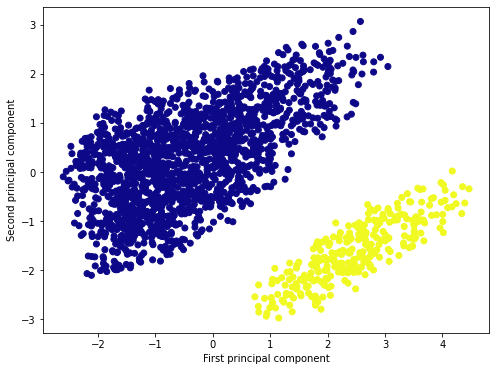

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=df['default'], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [26]:
#interpreting the components
# cost of PCA is not being able to easliy understand what these components represent
pca.components_

array([[ 0.01422716,  0.21907275, -0.15732368,  0.61929377,  0.581607  ,
         0.45305905],
       [ 0.02546185,  0.34317265,  0.72353223,  0.29524023,  0.14161855,
        -0.50086198]])

In [11]:
df.columns

Index(['clientid', 'income', 'age', 'loan', 'LTI', 'default'], dtype='object')

Index(['clientid', 'income', 'age', 'loan', 'LTI', 'default'], dtype='object')


<AxesSubplot:>

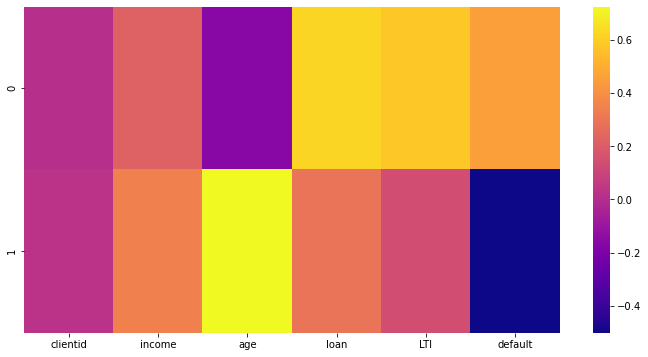

In [12]:
print(df.columns)
df_comp = pd.DataFrame(pca.components_, columns=df.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma')

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

In [16]:
features = pca.components_

In [18]:
y = np.array(df.default).reshape(-1, 1)

In [19]:
# we have 2 classes so the labels will have 2 values
# first class: (1,0) second class: (0,1)
encoder = OneHotEncoder()
targets = encoder.fit_transform(y).toarray()

In [38]:
train_features, test_features, train_targets, test_targets = train_test_split(x_pca, targets, test_size=0.2)
x_pca
#features2 = df[["income", "age", "loan"]]
#features2

array([[ 0.8838738 ,  2.05980327],
       [ 0.90285291,  0.72274153],
       [ 0.8584888 ,  2.10584226],
       ...,
       [ 1.76232246, -1.74956692],
       [-1.64987206,  1.04278254],
       [ 0.70502039,  1.95969767]])

In [39]:
model = Sequential()
model.add(Dense(10, input_dim=2, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

In [40]:
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [42]:
model.fit(train_features, train_targets, epochs=1000, verbose=2)
results = model.evaluate(test_features, test_targets, use_multiprocessing=True)

print("Training is finished... The loss and accuracy values are:")
print(results)

Epoch 1/1000
50/50 - 0s - loss: 9.6858e-10 - accuracy: 1.0000
Epoch 2/1000
50/50 - 0s - loss: 9.6858e-10 - accuracy: 1.0000
Epoch 3/1000
50/50 - 0s - loss: 9.6858e-10 - accuracy: 1.0000
Epoch 4/1000
50/50 - 0s - loss: 9.6858e-10 - accuracy: 1.0000
Epoch 5/1000
50/50 - 0s - loss: 9.6858e-10 - accuracy: 1.0000
Epoch 6/1000
50/50 - 0s - loss: 9.6858e-10 - accuracy: 1.0000
Epoch 7/1000
50/50 - 0s - loss: 9.6858e-10 - accuracy: 1.0000
Epoch 8/1000
50/50 - 0s - loss: 9.6858e-10 - accuracy: 1.0000
Epoch 9/1000
50/50 - 0s - loss: 9.6858e-10 - accuracy: 1.0000
Epoch 10/1000
50/50 - 0s - loss: 9.6858e-10 - accuracy: 1.0000
Epoch 11/1000
50/50 - 0s - loss: 9.6858e-10 - accuracy: 1.0000
Epoch 12/1000
50/50 - 0s - loss: 9.6858e-10 - accuracy: 1.0000
Epoch 13/1000
50/50 - 0s - loss: 9.6858e-10 - accuracy: 1.0000
Epoch 14/1000
50/50 - 0s - loss: 9.6858e-10 - accuracy: 1.0000
Epoch 15/1000
50/50 - 0s - loss: 9.6858e-10 - accuracy: 1.0000
Epoch 16/1000
50/50 - 0s - loss: 8.9407e-10 - accuracy: 1.0000
E

Epoch 131/1000
50/50 - 0s - loss: 7.4506e-10 - accuracy: 1.0000
Epoch 132/1000
50/50 - 0s - loss: 7.4506e-10 - accuracy: 1.0000
Epoch 133/1000
50/50 - 0s - loss: 7.4506e-10 - accuracy: 1.0000
Epoch 134/1000
50/50 - 0s - loss: 7.4506e-10 - accuracy: 1.0000
Epoch 135/1000
50/50 - 0s - loss: 7.4506e-10 - accuracy: 1.0000
Epoch 136/1000
50/50 - 0s - loss: 7.4506e-10 - accuracy: 1.0000
Epoch 137/1000
50/50 - 0s - loss: 7.4506e-10 - accuracy: 1.0000
Epoch 138/1000
50/50 - 0s - loss: 7.4506e-10 - accuracy: 1.0000
Epoch 139/1000
50/50 - 0s - loss: 7.4506e-10 - accuracy: 1.0000
Epoch 140/1000
50/50 - 0s - loss: 7.4506e-10 - accuracy: 1.0000
Epoch 141/1000
50/50 - 0s - loss: 7.4506e-10 - accuracy: 1.0000
Epoch 142/1000
50/50 - 0s - loss: 7.4506e-10 - accuracy: 1.0000
Epoch 143/1000
50/50 - 0s - loss: 7.4506e-10 - accuracy: 1.0000
Epoch 144/1000
50/50 - 0s - loss: 7.4506e-10 - accuracy: 1.0000
Epoch 145/1000
50/50 - 0s - loss: 7.4506e-10 - accuracy: 1.0000
Epoch 146/1000
50/50 - 0s - loss: 7.4506

Epoch 260/1000
50/50 - 0s - loss: 5.9605e-10 - accuracy: 1.0000
Epoch 261/1000
50/50 - 0s - loss: 5.9605e-10 - accuracy: 1.0000
Epoch 262/1000
50/50 - 0s - loss: 5.9605e-10 - accuracy: 1.0000
Epoch 263/1000
50/50 - 0s - loss: 5.9605e-10 - accuracy: 1.0000
Epoch 264/1000
50/50 - 0s - loss: 5.9605e-10 - accuracy: 1.0000
Epoch 265/1000
50/50 - 0s - loss: 5.9605e-10 - accuracy: 1.0000
Epoch 266/1000
50/50 - 0s - loss: 5.9605e-10 - accuracy: 1.0000
Epoch 267/1000
50/50 - 0s - loss: 5.9605e-10 - accuracy: 1.0000
Epoch 268/1000
50/50 - 0s - loss: 5.9605e-10 - accuracy: 1.0000
Epoch 269/1000
50/50 - 0s - loss: 5.9605e-10 - accuracy: 1.0000
Epoch 270/1000
50/50 - 0s - loss: 5.9605e-10 - accuracy: 1.0000
Epoch 271/1000
50/50 - 0s - loss: 5.9605e-10 - accuracy: 1.0000
Epoch 272/1000
50/50 - 0s - loss: 5.9605e-10 - accuracy: 1.0000
Epoch 273/1000
50/50 - 0s - loss: 5.9605e-10 - accuracy: 1.0000
Epoch 274/1000
50/50 - 0s - loss: 5.9605e-10 - accuracy: 1.0000
Epoch 275/1000
50/50 - 0s - loss: 5.9605

Epoch 389/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 390/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 391/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 392/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 393/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 394/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 395/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 396/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 397/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 398/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 399/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 400/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 401/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 402/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 403/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 404/1000
50/50 - 0s - loss: 3.7253

Epoch 518/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 519/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 520/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 521/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 522/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 523/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 524/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 525/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 526/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 527/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 528/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 529/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 530/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 531/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 532/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 533/1000
50/50 - 0s - loss: 3.7253

Epoch 647/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 648/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 649/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 650/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 651/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 652/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 653/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 654/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 655/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 656/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 657/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 658/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 659/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 660/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 661/1000
50/50 - 0s - loss: 3.7253e-10 - accuracy: 1.0000
Epoch 662/1000
50/50 - 0s - loss: 3.7253

Epoch 776/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 777/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 778/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 779/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 780/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 781/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 782/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 783/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 784/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 785/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 786/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 787/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 788/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 789/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 790/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 791/1000
50/50 - 0s - loss: 2.9802

Epoch 905/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 906/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 907/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 908/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 909/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 910/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 911/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 912/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 913/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 914/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 915/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 916/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 917/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 918/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 919/1000
50/50 - 0s - loss: 2.9802e-10 - accuracy: 1.0000
Epoch 920/1000
50/50 - 0s - loss: 2.9802